In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_data=pd.read_csv(r"C:\tested.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_data.shape

(418, 12)

In [4]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# drop the cabin colunm from data set
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [7]:
titanic_data = titanic_data.dropna()

In [8]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
print(titanic_data['Embarked'].mode()[0])

S


In [11]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,0.383686,2.141994,30.181269,0.483384,0.398792,40.982087
std,122.910180,0.487019,0.846251,14.104573,0.875004,0.811582,61.228558
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.500000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1100.000000,0.000000,2.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.500000,1.000000,3.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200


In [14]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    204
1    127
Name: count, dtype: int64

# Data Visualization

In [15]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

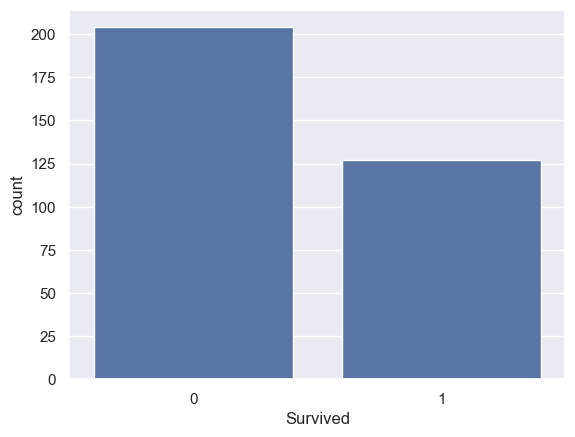

In [16]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

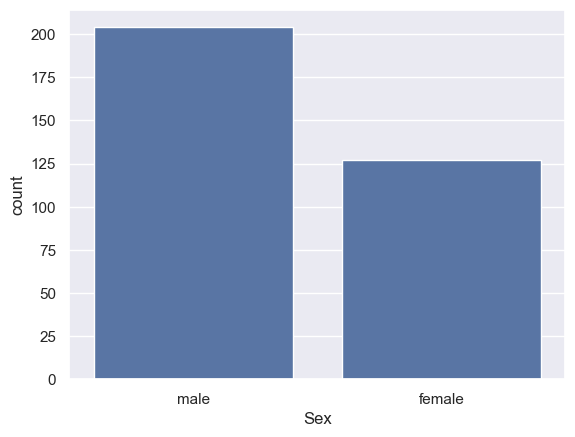

In [17]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

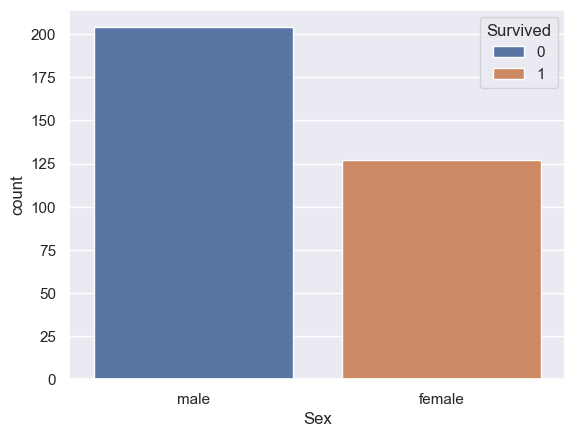

In [18]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

In [19]:
titanic_data['Sex'].value_counts()

Sex
male      204
female    127
Name: count, dtype: int64

In [20]:
titanic_data['Embarked'].value_counts()

Embarked
S    227
C     82
Q     22
Name: count, dtype: int64

In [21]:
# converting categorical Columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [23]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [24]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,0
411,1,1,37.0,1,0,90.0000,2
412,3,1,28.0,0,0,7.7750,0
414,1,1,39.0,0,0,108.9000,1


In [25]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

#### Splitting the data into training data & Test data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(331, 7) (264, 7) (67, 7)


Logic Regression

In [28]:
model = LogisticRegression()

In [29]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\kulde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

## Accuracy Score

In [31]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [32]:
print(X_train_prediction)

[0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0
 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 1 1 0 0]


In [33]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [35]:
print(X_test_prediction)

[0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1]


In [36]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
